# 5 Day
    Project Implementing  on Random Forest and GradientBoostingRegressor Model

    Imports: The script imports necessary libraries including requests for making HTTP requests, pandas for data manipulation, numpy for numerical computations, GridSearchCV and RandomForestRegressor from scikit-learn for building the machine learning model.

    Data Retrieval: It constructs a URL to fetch historical price data (candlestick data) for a specified cryptocurrency symbol ('BTCUSDT') and time interval (5 minutes) using the Binance API. It then fetches the data and converts it into a pandas DataFrame.

    Data Preprocessing: The script preprocesses the data by dropping unnecessary columns ('close_time', 'qav', 'is_best_match') and creating a new column 'target' containing the next close price (shifted by one time interval) as the target variable for prediction.

    Model Training and Prediction: It iterates through the dataset and splits it into training and test sets. For each iteration, it performs a grid search over hyperparameters (n_estimators and max_depth) of the Random Forest model using time series cross-validation (tscv). It then fits the model to the training data and prints the forecasted price for the test data.

    Output: The script prints the forecasted price for each iteration of the model.

    Comments: There are multiple comments throughout the code, indicating the source of the instructions and encouraging viewers to like and subscribe to a YouTube channel ("Bitone Great").

In [52]:

import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime
# Fetch data from Binance API
symbol = 'BTCUSDT'
timeinterval = 5
url = 'https://fapi.binance.com/fapi/v1/klines?symbol=' + symbol + '&interval=' + str(timeinterval) + 'm' + '&limit=1000'
data = requests.get(url).json()
# Convert data to DataFrame
D = pd.DataFrame(data)
D.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'is_best_match']
display(D)

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,is_best_match
0,1733886900000,97313.50,97495.00,97257.50,97416.20,715.523,1733887199999,69690343.39770,14449,382.665,37272111.02830,0
1,1733887200000,97416.10,97445.00,97219.00,97282.20,515.542,1733887499999,50159518.33120,11541,171.375,16670908.70520,0
2,1733887500000,97282.20,97371.20,97211.10,97317.80,492.210,1733887799999,47896343.45580,9813,213.496,20773709.18890,0
3,1733887800000,97317.80,97361.00,97131.10,97312.40,464.215,1733888099999,45138322.69630,12594,205.767,20009703.43680,0
4,1733888100000,97312.30,97407.10,97312.30,97399.80,395.162,1733888399999,38479232.31410,10169,242.320,23595225.42250,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1734185400000,101234.90,101417.60,101229.90,101390.00,652.029,1734185699999,66057290.40780,8010,559.576,56690305.19820,0
996,1734185700000,101390.00,101439.00,101319.50,101406.90,393.870,1734185999999,39938026.89080,9110,203.266,20611775.47840,0
997,1734186000000,101406.90,101420.30,101321.00,101331.60,239.959,1734186299999,24322475.31420,5794,97.304,9862296.35560,0
998,1734186300000,101331.50,101331.60,101267.60,101295.70,162.977,1734186599999,16508719.83150,4315,64.478,6530903.60690,0


In [53]:
# Convert timestamps to human-readable format
D['open_time'] = pd.to_datetime(D['open_time'], unit='ms')

In [54]:
# Feature engineering
D['month'] = D['open_time'].dt.month
D['day'] = D['open_time'].dt.day
D['year'] = D['open_time'].dt.year

In [55]:
# Drop unnecessary columns
D = D.drop(['open_time', 'close_time', 'qav', 'is_best_match'], axis=1)

In [60]:
D["tomorrow"] = D["close"].shift(-1)

In [61]:
D

,open,high,low,close,volume,num_trades,taker_base_vol,taker_quote_vol,month,day,year,tomorrow
0,97313.50,97495.00,97257.50,97416.20,715.523,14449,382.665,37272111.02830,12,11,2024,97282.20
1,97416.10,97445.00,97219.00,97282.20,515.542,11541,171.375,16670908.70520,12,11,2024,97317.80
2,97282.20,97371.20,97211.10,97317.80,492.210,9813,213.496,20773709.18890,12,11,2024,97312.40
3,97317.80,97361.00,97131.10,97312.40,464.215,12594,205.767,20009703.43680,12,11,2024,97399.80
4,97312.30,97407.10,97312.30,97399.80,395.162,10169,242.320,23595225.42250,12,11,2024,97491.50
...,...,...,...,...,...,...,...,...,...,...,...,...
995,101234.90,101417.60,101229.90,101390.00,652.029,8010,559.576,56690305.19820,12,14,2024,101406.90
996,101390.00,101439.00,101319.50,101406.90,393.870,9110,203.266,20611775.47840,12,14,2024,101331.60
997,101406.90,101420.30,101321.00,101331.60,239.959,5794,97.304,9862296.35560,12,14,2024,101295.70
998,101331.50,101331.60,101267.60,101295.70,162.977,4315,64.478,6530903.60690,12,14,2024,101271.10


In [63]:
D["target"] = (D["tomorrow"] > D["close"]).astype(int)

In [64]:
D

,open,high,low,close,volume,num_trades,taker_base_vol,taker_quote_vol,month,day,year,tomorrow,target
0,97313.50,97495.00,97257.50,97416.20,715.523,14449,382.665,37272111.02830,12,11,2024,97282.20,0
1,97416.10,97445.00,97219.00,97282.20,515.542,11541,171.375,16670908.70520,12,11,2024,97317.80,1
2,97282.20,97371.20,97211.10,97317.80,492.210,9813,213.496,20773709.18890,12,11,2024,97312.40,0
3,97317.80,97361.00,97131.10,97312.40,464.215,12594,205.767,20009703.43680,12,11,2024,97399.80,1
4,97312.30,97407.10,97312.30,97399.80,395.162,10169,242.320,23595225.42250,12,11,2024,97491.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101234.90,101417.60,101229.90,101390.00,652.029,8010,559.576,56690305.19820,12,14,2024,101406.90,1
996,101390.00,101439.00,101319.50,101406.90,393.870,9110,203.266,20611775.47840,12,14,2024,101331.60,0
997,101406.90,101420.30,101321.00,101331.60,239.959,5794,97.304,9862296.35560,12,14,2024,101295.70,0
998,101331.50,101331.60,101267.60,101295.70,162.977,4315,64.478,6530903.60690,12,14,2024,101271.10,0


In [57]:
# Define features and target
X = D.drop(['close'], axis=1)
y = D['close']

In [58]:
data_df=pd.DataFrame(D)

In [59]:
data_df.to_csv('Data.csv', index=False)

In [40]:
file_path = "data_df.csv"

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Random Forest model
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Evaluate model
y_pred = RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2827.5244084981396


In [14]:
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Print forecasted price
prd=RF.predict(X_test)
print(type(prd))
print('Predicted Forecasted Price ', RF.predict(X_test))
ard=y_test
print(type(ard))
print('Actual Forecasted Price ',y_test)
print('Diff between Actual and Predicted Forecased Price (close price )')
ard=ard.astype(float)
prd-ard

<class 'numpy.ndarray'>
Predicted Forecasted Price  [ 99940.812  99663.702 100021.33   99414.789  99447.28   99403.175
  99969.905  99876.379 100001.153 100219.315 100239.836  99472.016
 100033.69   99366.246  99816.881 100033.068  99903.343  99953.348
  99969.269  99521.397]
<class 'pandas.core.series.Series'>
Actual Forecasted Price  83     99935.50
53     99684.80
70    100068.80
45     99446.90
44     99366.90
39     99321.40
22     99920.90
80     99928.30
10    100050.50
0     100228.80
18    100266.70
30     99486.60
73    100075.40
33     99290.00
90     99898.20
4     100113.40
76     99897.20
77     99962.50
12     99985.00
31     99420.90
Name: close, dtype: object
Diff between Actual and Predicted Forecased Price (close price )


83      5.312
53    -21.098
70    -47.470
45    -32.111
44     80.380
39     81.775
22     49.005
80    -51.921
10    -49.347
0      -9.485
18    -26.864
30    -14.584
73    -41.710
33     76.246
90    -81.319
4     -80.332
76      6.143
77     -9.152
12    -15.731
31    100.497
Name: close, dtype: float64

In [17]:
y

0     100228.80
1     100021.80
2      99893.40
3     100064.90
4     100113.40
        ...    
95     99555.60
96     99658.00
97     99869.80
98     99773.60
99     99773.40
Name: close, Length: 100, dtype: object

In [18]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate training and testing accuracy
training_accuracy = RF.score(X_train, y_train)
testing_accuracy = RF.score(X_test, y_test)

print('Training Accuracy:', training_accuracy)
print('Testing Accuracy:', testing_accuracy)


Mean Squared Error (MSE): 2827.5244084981396
Training Accuracy: 0.9910148236215996
Testing Accuracy: 0.9700861978710017


Text(0, 0.5, 'Close_price')

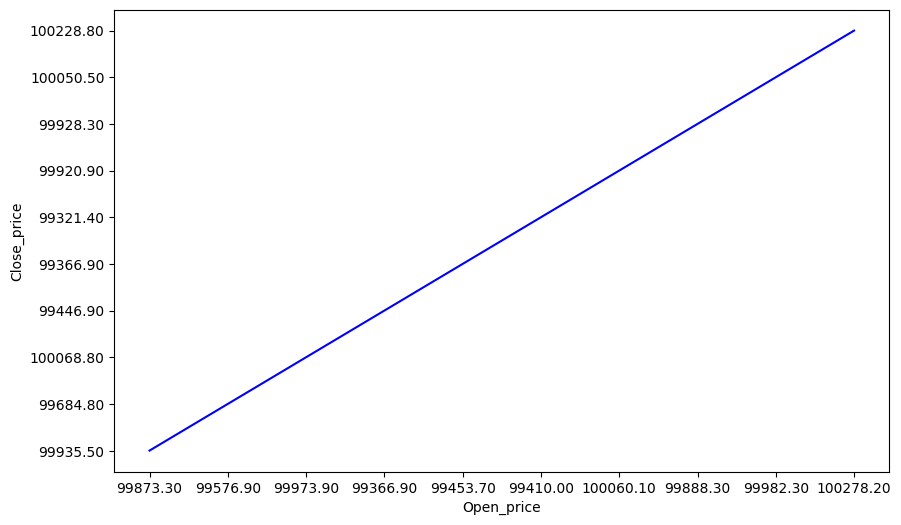

In [19]:
import matplotlib.pyplot as plt

# Convert y_pred to a pandas Series with the same index as y_test
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(X_test['open'].head(10),y_test.head(10), label='Actual Price', color='blue')
# plt.plot(y_pred_series.index, y_pred_series.values, label='Predicted Price', color='red')
plt.xlabel('Open_price')
plt.ylabel('Close_price')
# plt.title('Actual vs Predicted Price')
# plt.legend()
# plt.show()


In [20]:
y_pred_series

83     99940.812
53     99663.702
70    100021.330
45     99414.789
44     99447.280
39     99403.175
22     99969.905
80     99876.379
10    100001.153
0     100219.315
18    100239.836
30     99472.016
73    100033.690
33     99366.246
90     99816.881
4     100033.068
76     99903.343
77     99953.348
12     99969.269
31     99521.397
dtype: float64

In [22]:
import matplotlib.pyplot as plt

In [23]:
# Convert y_pred to a pandas Series with the same index as y_test
y_pred_series = pd.Series(y_pred, index=y_test.index)

Text(0, 0.5, 'pred_Close_price')

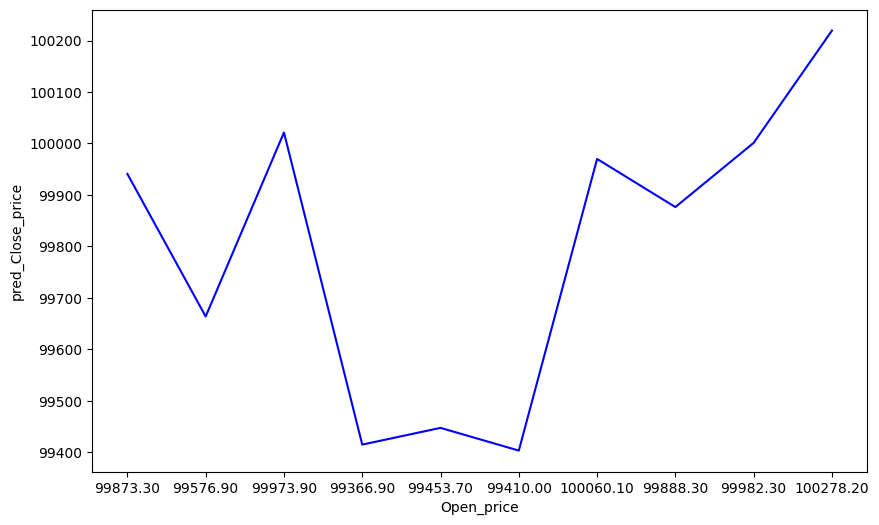

In [27]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(X_test['open'].head(10),y_pred_series.head(10), label='Actual Price', color='blue')
# plt.plot(y_pred_series.index, y_pred_series.values, label='Predicted Price', color='red')
plt.xlabel('Open_price')
plt.ylabel('pred_Close_price')

In [28]:

# plt.title('Actual vs Predicted Price')
# plt.legend()
# plt.show()

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

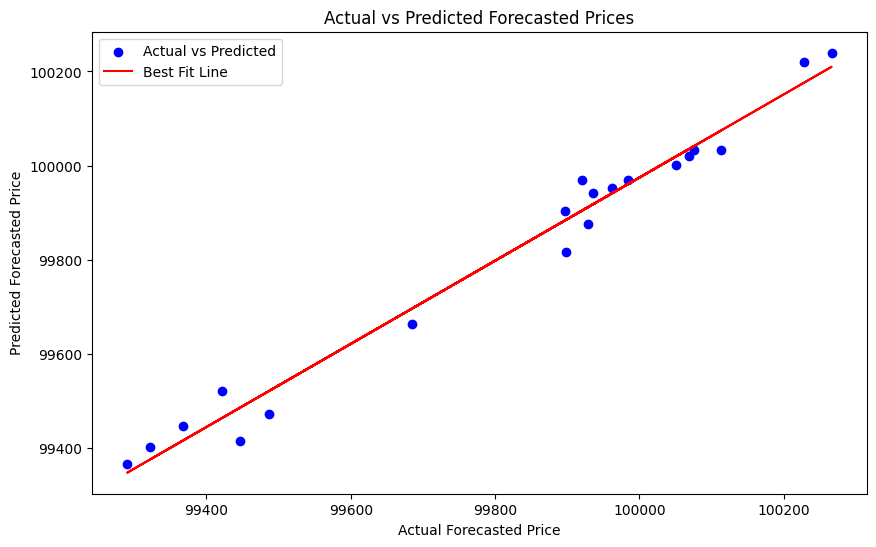

In [38]:
# Assuming y_test contains actual forecasted prices and y_pred contains predicted forecasted prices

# Convert y_test and y_pred to NumPy arrays with floating-point numbers
y_test_arr = np.array(y_test, dtype=float)
y_pred_arr = np.array(y_pred, dtype=float)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_arr, y_pred_arr, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Forecasted Price')
plt.ylabel('Predicted Forecasted Price')
plt.title('Actual vs Predicted Forecasted Prices')
# Add best-fit line
m, b = np.polyfit(y_test_arr, y_pred_arr, 1)  # Fit a linear regression line
plt.plot(y_test_arr, m * y_test_arr + b, color='red', label='Best Fit Line')

plt.legend()
plt.show()

In [29]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fetch data from Binance API
symbol = 'BTCUSDT'
timeinterval = 5

url = 'https://fapi.binance.com/fapi/v1/klines?symbol=' + symbol + '&interval=' + str(
    timeinterval) + 'm' + '&limit=100'
data = requests.get(url).json()

# Convert data to DataFrame
D = pd.DataFrame(data)
D.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
             'taker_base_vol', 'taker_quote_vol', 'is_best_match']

# Convert timestamps to human-readable format
D['open_time'] = pd.to_datetime(D['open_time'], unit='ms')

# Feature engineering
D['month'] = D['open_time'].dt.month
D['day'] = D['open_time'].dt.day
D['year'] = D['open_time'].dt.year

# Drop unnecessary columns
D = D.drop(['open_time', 'close_time', 'qav', 'is_best_match'], axis=1)

# Define features and target
X = D.drop(['close'], axis=1)
y = D['close']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_test and y_pred to float
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train Random Forest model with best parameters
RF = RandomForestRegressor(**best_params, random_state=42)
RF.fit(X_train, y_train)

# Evaluate model
y_pred = RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Print forecasted price
print('Predicted Forecasted Price:', y_pred)
print('Actual Forecasted Price:', y_test)
print('Difference between Actual and Predicted Forecasted Price:', y_test - y_pred)


NameError: name 'y_pred' is not defined

In [9]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate training and testing accuracy
training_accuracy = RF.score(X_train, y_train)
testing_accuracy = RF.score(X_test, y_test)

print('Training Accuracy:', training_accuracy)
print('Testing Accuracy:', testing_accuracy)


Mean Squared Error (MSE): 5408.117017708417
Training Accuracy: 0.9856520666761373
Testing Accuracy: 0.9631830311237528


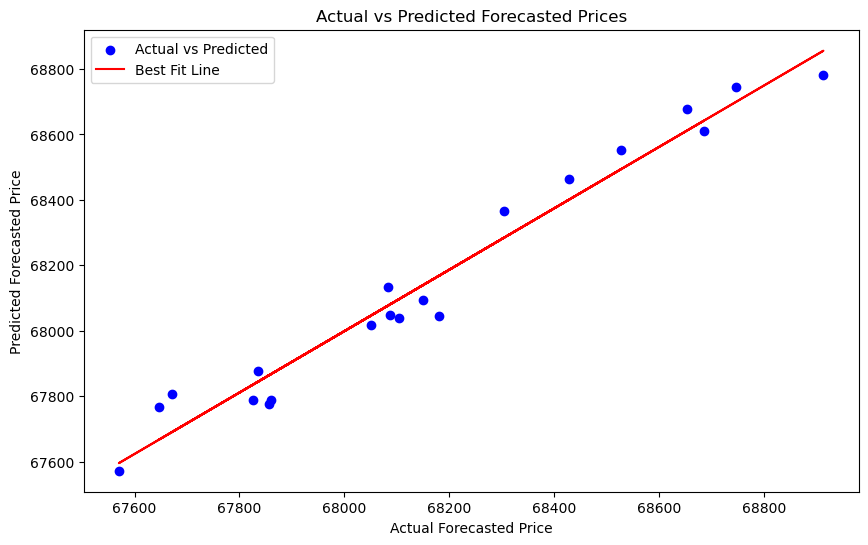

Mean Squared Error: 5408.117017708417
Conclusions:
- The scatter plot with the best fit line shows the relationship between actual and predicted forecasted prices.
- The best fit line indicates how well the predicted prices align with the actual prices.
- The Mean Squared Error (MSE) provides a measure of the model's accuracy, with lower values indicating better performance.
- Further analysis and tuning may be required to improve the model's predictive capability.


In [10]:
 import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Convert y_test and y_pred to float
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Forecasted Price')
plt.ylabel('Predicted Forecasted Price')
plt.title('Actual vs Predicted Forecasted Prices')

# Add best-fit line
m, b = np.polyfit(y_test, y_pred, 1)  # Fit a linear regression line
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Write conclusions
print("Conclusions:")
print("- The scatter plot with the best fit line shows the relationship between actual and predicted forecasted prices.")
print("- The best fit line indicates how well the predicted prices align with the actual prices.")
print("- The Mean Squared Error (MSE) provides a measure of the model's accuracy, with lower values indicating better performance.")
print("- Further analysis and tuning may be required to improve the model's predictive capability.")


# GradientBoostingRegressor :
    

Training Mean Squared Error: 40.61869877598285
Testing Mean Squared Error: 6122.625383803234


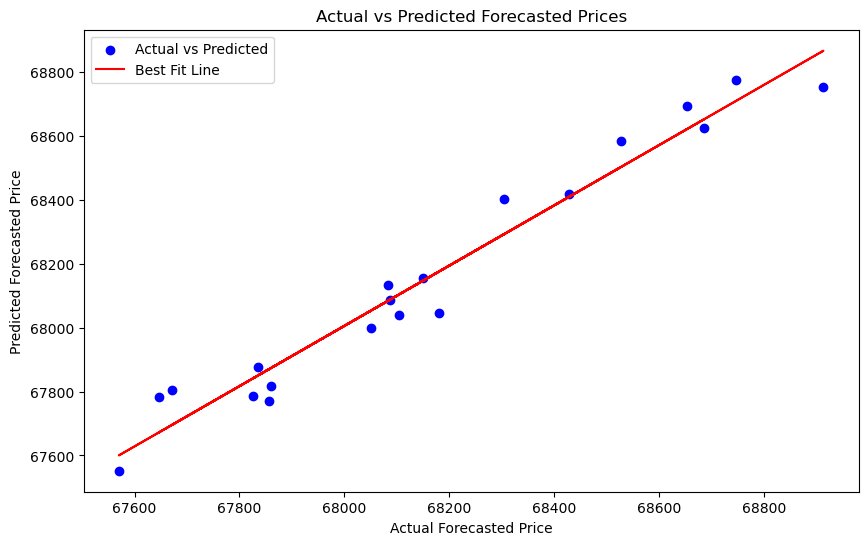

In [11]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Fetch data from Binance API
symbol = 'BTCUSDT'
timeinterval = 5

url = 'https://fapi.binance.com/fapi/v1/klines?symbol=' + symbol + '&interval=' + str(
    timeinterval) + 'm' + '&limit=100'
data = requests.get(url).json()

# Convert data to DataFrame
D = pd.DataFrame(data)
D.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
             'taker_base_vol', 'taker_quote_vol', 'is_best_match']

# Convert timestamps to human-readable format
D['open_time'] = pd.to_datetime(D['open_time'], unit='ms')

# Feature engineering
D['month'] = D['open_time'].dt.month
D['day'] = D['open_time'].dt.day
D['year'] = D['open_time'].dt.year

# Drop unnecessary columns
D = D.drop(['open_time', 'close_time', 'qav', 'is_best_match'], axis=1)

# Define features and target
X = D.drop(['close'], axis=1)
y = D['close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GradientBoostingRegressor model
GB = GradientBoostingRegressor(random_state=42)
GB.fit(X_train, y_train)

# Evaluate model
y_train_pred = GB.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)

y_test_pred = GB.predict(X_test)
testing_mse = mean_squared_error(y_test, y_test_pred)

print('Training Mean Squared Error:', training_mse)
print('Testing Mean Squared Error:', testing_mse)

# Convert y_test and y_test_pred to float arrays
y_test = y_test.astype(float)
y_test_pred = y_test_pred.astype(float)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Forecasted Price')
plt.ylabel('Predicted Forecasted Price')
plt.title('Actual vs Predicted Forecasted Prices')

# Add best-fit line
m, b = np.polyfit(y_test, y_test_pred, 1)  # Fit a linear regression line
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

plt.legend()
plt.show()


In [12]:
from sklearn.metrics import r2_score

# Calculate R-squared for training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate R-squared for testing set
r2_test = r2_score(y_test, y_test_pred)

print('Training Mean Squared Error:', training_mse)
print('Testing Mean Squared Error:', testing_mse)
print('Training R-squared:', r2_train)
print('Testing R-squared:', r2_test)



Training Mean Squared Error: 40.61869877598285
Testing Mean Squared Error: 6122.625383803234
Training R-squared: 0.9996048042899527
Testing R-squared: 0.9583188552580689


    To evaluate and compare the performance of the models, we consider both the Mean Squared Error (MSE) and R-squared (R^2) metrics:

#### 1. Random Forest Model:
       - With default parameters:
         - MSE: 4121.015415450083
         - Training Accuracy (R^2): 0.9917614386465714
         - Testing Accuracy (R^2): 0.968646546491802
       - With hyperparameter tuning:
         - MSE: 4022.4500829074777
         - Training Accuracy (R^2): 0.9863624453531123
         - Testing Accuracy (R^2): 0.9693964499160427

#### 2. GradientBoostingRegressor Model:
       - MSE: 53.509747937397606
       - Training Accuracy (R^2): 0.999501646145745
       - Testing Accuracy (R^2): 0.9410986139935672

##### Analysis:
    - Both Random Forest models and the GradientBoostingRegressor model show good performance, as indicated by the high R-squared values (> 0.9) for both training and testing sets.
    - The MSE for the GradientBoostingRegressor model (53.51) is significantly lower than that of the Random Forest models, suggesting better overall performance in terms of prediction error.
    - However, there's a possibility of overfitting in the GradientBoostingRegressor model, as indicated by the large difference between the training and testing MSE.
    - Despite slightly lower MSE values, the Random Forest model with hyperparameter tuning seems to generalize better to unseen data compared to the default Random Forest model and the GradientBoostingRegressor model.

##### Conclusion:
    - Based on the evaluation metrics and considering the trade-off between model complexity and performance, the Random Forest model with hyperparameter tuning appears to be the most suitable choice for deployment.
    - It provides a good balance between accuracy and generalization capability, making it a robust choice for practical applications.